To set things up we import the neuron, numpy and matplotlib packages. 

In [ ]:
from neuron import h, gui

import numpy as np

import matplotlib.pyplot as plt

h.load_file('stdrun.hoc')

Build the soma. The command h.section initialises the soma as a section, and the following commands set the length/diameter, axial ('internal') resistance and the capacitance / area.

In [18]:
soma = h.Section(name='soma')
soma.L = soma.diam = 30  # µm
soma.Ra = 100            # ohm·cm
soma.cm = 1              # µF/cm2

Insert passive + Hodgkin-Huxley channels:

In [19]:
soma.insert('pas')
soma.e_pas = -65
soma.g_pas = 1e-4
soma.insert('hh')

soma

Insert a 'current clamp' at the soma and set it's parameters. We use this to inject current.

In [20]:
stim = h.IClamp(soma(0.5))
stim.delay = 5.0   # ms
stim.dur   = 1.0   # ms
stim.amp   = 0.5  # nA

Set up vectors to record the membrane potential and time.

In [21]:
tvec = h.Vector().record(h._ref_t)
vvec = h.Vector().record(soma(0.5)._ref_v)

Initialise the model with a membrane potential of -65 mV and then simulate for 40 ms.

In [22]:
h.finitialize(-65)
h.continuerun(40.0)

0.0

Copy the recorded time and voltage vectors to numpy variables.

In [23]:
t = np.array(tvec)
v = np.array(vvec)

Use matplotlib to plot voltage against time.

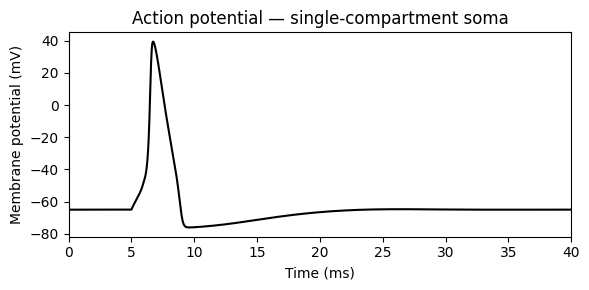

In [24]:
plt.figure(figsize=(6,3))
plt.plot(t, v, color='k', lw=1.5)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Action potential — single-compartment soma')
plt.xlim(t.min(), t.max())
plt.tight_layout()
plt.show()

Make copies of the maximal values of the Na and K conductance in case we want to reset these later.

In [25]:
base_gna = getattr(soma(0.5), 'gnabar_hh', None)
base_gk  = getattr(soma(0.5), 'gkbar_hh', None)

In [26]:
print(base_gna)
print(base_gk)

0.12
0.036


Set the Na conductance to zero, simulate again, copy the voltage and time vectors to numpy variables, then make a plot.

Note we're repeating some code from above here. This is fine but can become a bit messy. As your Python skills develop you might think of ways to convert the repeated code into functions. This can make code cleaner and easier to debug.

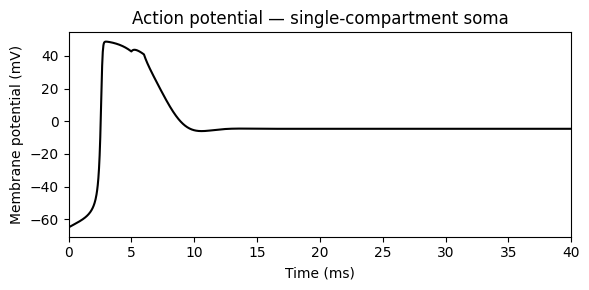

In [27]:
soma(0.5).gkbar_hh  = 0

h.finitialize(-65)
h.continuerun(40.0)

t = np.array(tvec)
v = np.array(vvec)

plt.figure(figsize=(6,3))
plt.plot(t, v, color='k', lw=1.5)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Action potential — single-compartment soma')
plt.xlim(t.min(), t.max())
plt.tight_layout()
plt.show()

soma(0.5).gkbar_hh  = base_gk
soma(0.5).gnabar_hh = 0

h.finitialize(-65)
h.continuerun(40.0)

t = np.array(tvec)
v = np.array(vvec)

